# Análise de Eficiência de Turbina Eólica

Este projeto de análise de dados foi desenvolvido como parte do meu portfólio, com o objetivo de avaliar a eficiência de uma turbina eólica em com base na potência real gerada e na potência teórica esperada para diferentes velocidades do vento.

## Objetivo

A principal meta deste estudo é verificar se a turbina eólica em questão está operando de forma eficiente. Para isso, comparamos a potência real gerada (Potência (kWh)) com a potência teórica (Potência teórica (kWh)) que a turbina deveria gerar, conforme a velocidade do vento registrada. A análise se baseia nos seguintes passos:

1. **Cálculo do Desvio Padrão**: Determinação do desvio padrão dos dados de potência real para entender a variabilidade nas medições.
   
2. **Cálculo da Incerteza Tipo A**: Aplicação do método de incerteza Tipo A para quantificar a incerteza associada à média das medições.

3. **Visualização dos Dados**: Agrupamento dos dados e criação de um gráfico colorido para identificar visualmente os pontos onde a potência real está em desacordo com a potência teórica. Esses pontos podem indicar possíveis ineficiências ou problemas operacionais na turbina.

Este estudo é fundamental para identificar possíveis áreas de melhoria na operação da turbina, ajudando a garantir uma maior eficiência energética e confiabilidade no fornecimento de energia.


#1. Importando os dados

Primeiramente é importante importar os dados que estão no arquivo csv chamado "turbina.csv" para que possemos fazer a análise com base neles.

In [50]:
import pandas as pd

turbina = pd.read_csv("turbina.csv")

display(turbina)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


#2. Importando bibliotecas importantes

Além do pandas para a manipulação da tabela, vamos importar algumas bibliotecas de plotagem de gráficos.

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#3. Tratamento da tabela

Como as colunas estão em inglês, decidi renomeá-los para facilitar a compreensão do código

In [52]:
turbina.columns = ["Tempo", "Potência (kWh)", "Velocidade do vento (m/s)", "Potência teórica (kWh)", "Direção do vento (º)"]

Vamos agoa deletar a coluna "Direção do vento (º)", pois nao a utilizaremos nesta análise. Além disso, vamos organizar a coluna de "Tempo" de forma que o pandas a "enxergue" como uma coluna que tem informações do tipo DateTime.

In [53]:
del turbina["Direção do vento (º)"]
turbina["Tempo"] = pd.to_datetime(turbina["Tempo"], format="%d %m %Y %H:%M")

Assim, nossa tabela ficará da seguinte forma:

In [54]:
display(turbina)

,Tempo,Potência (kWh),Velocidade do vento (m/s),Potência teórica (kWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


#4. Visualização dos dados

Agora vamos plotar os gráficos de visualização dos dados. Começando com o gráfico que indica a potência real gerada pela turbina em cada valor de velocidade do vento.

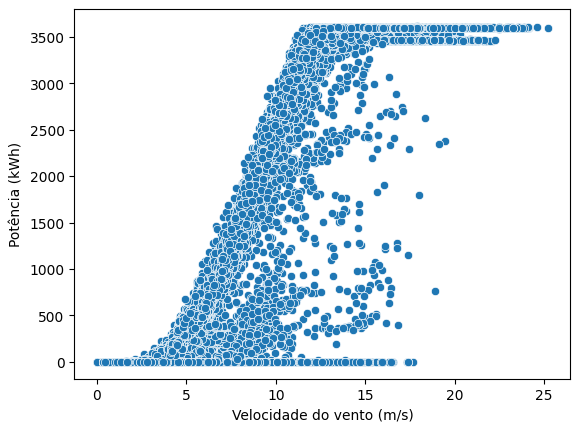

In [55]:
sns.scatterplot(data=turbina, x="Velocidade do vento (m/s)", y="Potência (kWh)")
plt.show()

Neste segundo caso, temos a cruva teórica da potência que a turbina deveria gerar:

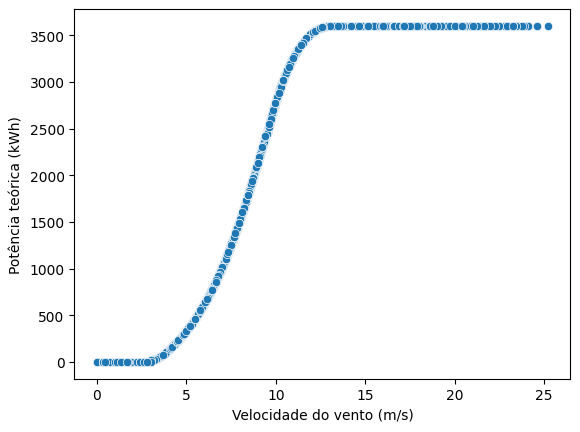

In [56]:
sns.scatterplot(data=turbina, x="Velocidade do vento (m/s)", y="Potência teórica (kWh)")
plt.show()

Assim, percebemos que muitos valores reais não condizem com os valores teóricos de potência.

#5. A análise dos dados

Vamos primeiramente definir quais são os valores mínimos e máximos aceitáveis de potência. Primeiramente alculamos a incerteza tipo A, utilizando o desvio padrão retornado do método std() do pandas, associada à medida da potência real.

In [57]:
incerteza = turbina["Potência (kWh)"].std()/(len(turbina["Potência (kWh)"]))**(1/2)
print(f"A incerteza: {incerteza}")

A incerteza: 5.838632983215111


Com esse valor de incerteza, vamos agora definir uma lista com os valores máximos e outra com os valores mínimos de potência aceitável. Além disso, vamos definir uma lista chamada dentro_limite que indica se certo valor de potência está dentro dos limites teóricos aceitáveis definidos com as duas listas criadas utilizando os valores de potência real. Devemos também considerar os valores de potência que estçao zerados de forma separada, pois os mesmos nem sempre indicam uma ineficiência na geração de energia, e sim uma manutenção ou diversos outros fatores que fizeram com que a turbina fosse desligada naquele momento.

In [58]:
pot_real = turbina["Potência (kWh)"].to_list()
pot_teorica = turbina["Potência teórica (kWh)"].to_list()
pot_max = []
pot_min = []

for i in range(len(pot_teorica)):
    pot_max.append(pot_teorica[i] + incerteza)
    if pot_teorica[i] != 0:
      pot_min.append(pot_teorica[i] - incerteza)
    else:
      pot_min.append(0)

dentro_limite = []

for j, potencia in enumerate(pot_real):
  if potencia >= pot_min[j] and potencia <= pot_max[j]:
    dentro_limite.append("Dentro")
  elif potencia == 0:
    dentro_limite.append("Zerado")
  else:
    dentro_limite.append("Fora")

porcentagem_dentro_limite = dentro_limite.count('Dentro')/len(pot_real)*100
print(f"A porcentagem de valores dentro do limite é: {round(porcentagem_dentro_limite, 2)}%")


A porcentagem de valores dentro do limite é: 23.22%


Agora colocamos essa lista dentro_limite em uma coluna do nosso DataFrame

In [59]:
turbina["Aceitável"] = dentro_limite
display(turbina)

,Tempo,Potência (kWh),Velocidade do vento (m/s),Potência teórica (kWh),Aceitável
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Fora


#6. Plotando o gráfico final

Por fim, plotamos os gráfico final indicando os valores que estão fora do intervalo aceitável (Vermelho), os que estão dentro (Verde) e os zeros (Amarelo).

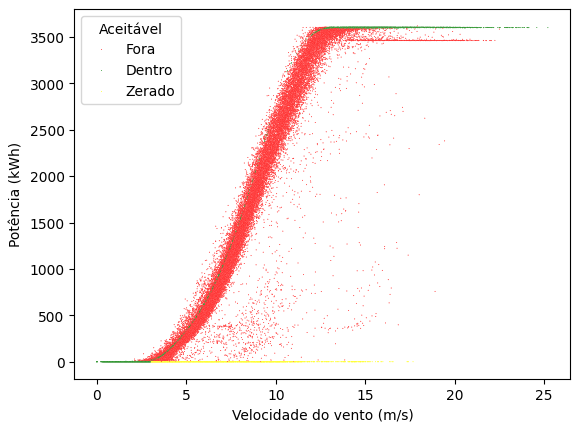

In [60]:
cores = {
    "Dentro": "green",
    "Fora": "red",
    "Zerado": "yellow"
}

sns.scatterplot(data=turbina, x="Velocidade do vento (m/s)", y="Potência (kWh)", hue="Aceitável", s=0.5, palette=cores)
plt.show()

Dessa forma, podemos observar que a turbina está operando de forma muito ineficiente, podendo ter algum problema de engenharia envolvido. Isso também é evidente visto que apenas 23% dos valores estão de acordo com os valores de potência teóricos.